<a href="https://colab.research.google.com/github/PhamTuanKiet02/report/blob/main/5Flowerr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications import imagenet_utils

folder = '/content/drive/MyDrive/5Flower/'
photos, labels = list(), list()
for file in os.listdir(folder):
    if file.startswith('hoamai'):
        output = 0
    elif file.startswith('hoacuc'):
        output = 1
    elif file.startswith('hoahong'):
        output = 2
    elif file.startswith('hoasen'):
        output = 3
    elif file.startswith('hoasung'):
        output = 4
        
    photo = load_img(os.path.join(folder, file), target_size=(200, 200))
    photo = img_to_array(photo)
    photo = imagenet_utils.preprocess_input(photo)
    photos.append(photo)
    labels.append(output)

photos = np.array(photos)
labels = np.array(labels)
labels = to_categorical(labels, num_classes=5)

np.save('5flower_photos.npy', photos)
np.save('5flower_labels.npy', labels)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(photos, labels, epochs=30, batch_size=64, validation_split=0.2)

model.evaluate(photos, labels)


Epoch 1/30
1/1 [==============================] - 15s 15s/step - loss: 15.2712 - accuracy: 0.2083 - val_loss: 640.4385 - val_accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 98ms/step - loss: 157.2677 - accuracy: 0.4167 - val_loss: 272.8842 - val_accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 93ms/step - loss: 99.5798 - accuracy: 0.2292 - val_loss: 71.5664 - val_accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 94ms/step - loss: 27.4953 - accuracy: 0.3542 - val_loss: 26.6943 - val_accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 94ms/step - loss: 10.6432 - accuracy: 0.3958 - val_loss: 7.7995 - val_accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 99ms/step - loss: 2.7226 - accuracy: 0.4375 - val_loss: 2.4533 - val_accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 0s 97ms/step - loss: 1.9544 - accuracy: 0.3333 - val_loss: 1.5729 - val_accuracy

[0.310702919960022, 0.868852436542511]

In [ ]:
model.save('5Flower.h5')

In [ ]:
classes = ["hoamai","hoacuc","hoahong","hoasen","hoasung",]


1/1 [==============================] - 0s 19ms/step
[[0.19358091 0.20002405 0.20874386 0.2000087  0.19764249]]


'hoahong'

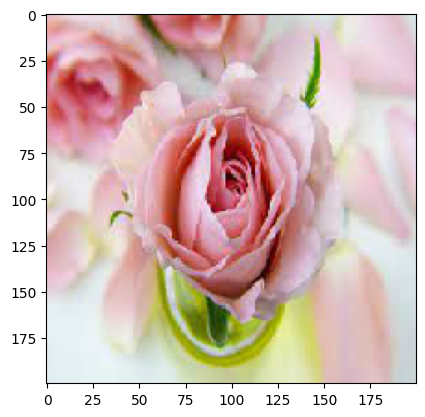

In [ ]:
img = load_img('/content/drive/MyDrive/nhandangmonan/hoahong.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]